In [2]:
import os
import warnings
import numpy as np
import xarray as xr
import proplot as pplt
from pathlib import Path
import matplotlib.pyplot as plt
pplt.rc['reso']='xx-hi'
pplt.rc['font.size'] = 10
pplt.rc['figure.dpi'] = 100
warnings.filterwarnings('ignore')

In [44]:
DATADIR    = Path('../data')
WEIGHTSDIR = DATADIR/'weights'
FIGDIR     = Path('../figs')

In [45]:
weightfiles = list(WEIGHTSDIR.glob('*_weights.nc'))

if not weightfiles:
    print('No weight files found')
else:
    print(f'Found {len(weightfiles)} weight files:')
    for file in weightfiles:
        print(f'  - {file.name}') 

Found 3 weight files:
  - nonparametric_horizontal_valid_weights.nc
  - nonparametric_temporal_valid_weights.nc
  - nonparametric_vertical_valid_weights.nc


In [46]:
ds = xr.open_dataset(weightfiles[-1])
ds

<xarray.Dataset>
Dimensions:  (field: 3, member: 4, lev: 16)
Coordinates:
  * field    (field) object 'rh' 'thetae' 'thetaestar'
  * member   (member) int64 0 1 2 3
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    weights  (field, member, lev) float32 ...

In [47]:
weights = ds.weights
levs    = ds.lev.values
means   = weights.mean(dim='member') 
stds    = weights.std(dim='member')

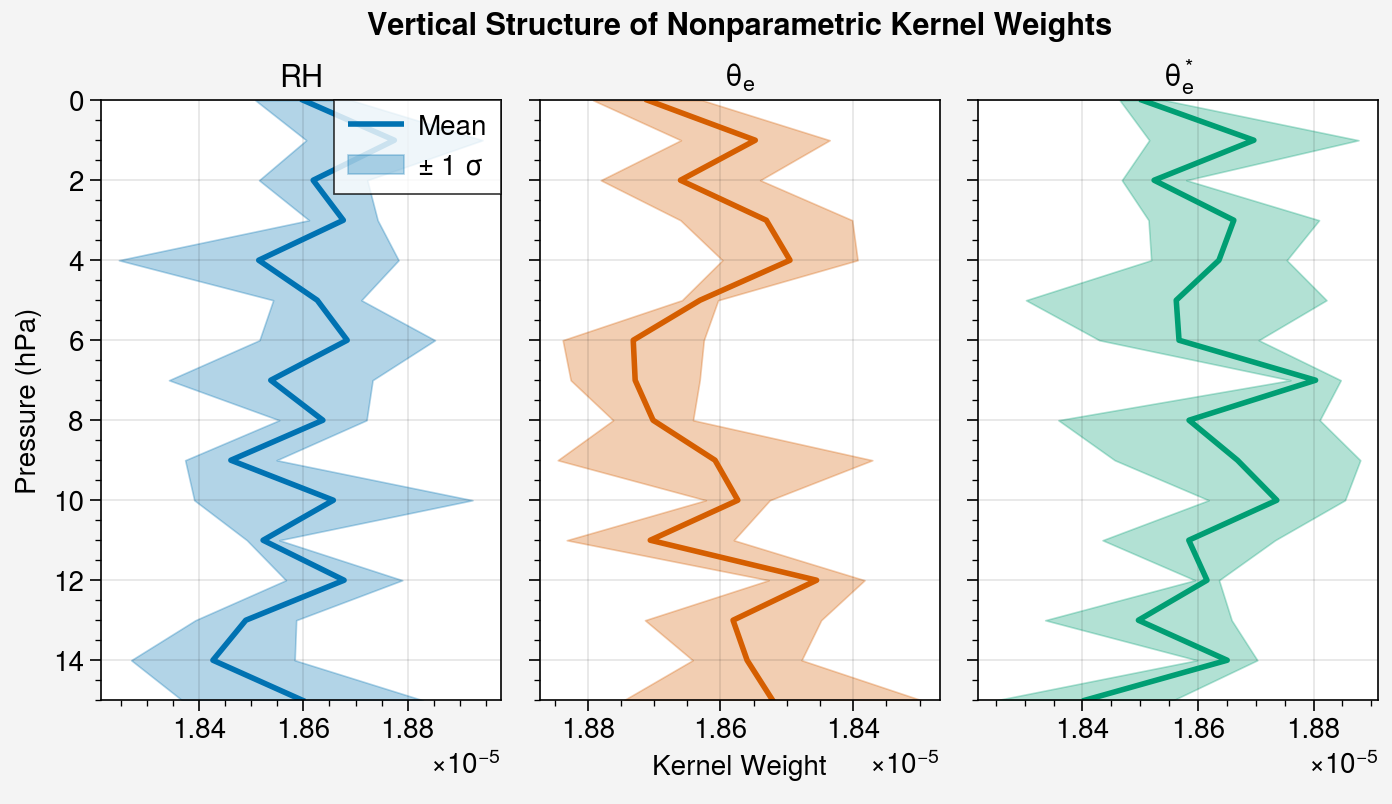

In [48]:
labels  = ['RH',r'$\theta_e$',r'$\theta_e^*$']     
colors  = ['C0','C1','C2']

fig,axs = pplt.subplots(nrows=1,ncols=3,refwidth=2,refheight=3,share=True)
axs.format(suptitle='Vertical Structure of Nonparametric Kernel Weights',
           xlabel='Kernel Weight',ylabel='Pressure (hPa)',yreverse=True)
for i,ax in enumerate(axs):
    mean = means[i,:]
    std  = stds[i,:]
    ax.plot(mean,levs,color=colors[i],linewidth=2,label='Mean')
    ax.fill_betweenx(levs,mean-std,mean+std,color=colors[i],alpha=0.3,label='± 1 $\sigma$')
    ax.format(title=labels[i])
axs[0].legend(loc='ur',ncols=1)
# fig.save(FIGDIR/'kernel_weights_vertical.png',dpi=300,bbox_inches='tight')
pplt.show()

In [38]:
ds = xr.open_dataset('/global/cfs/cdirs/m4334/sferrett/monsoon-kernels/data/splits/valid.h5',engine='h5netcdf')
ds.lev
dlev = np.diff(ds.lev)


In [35]:
w = weights.mean(dim=('field','member')).values
print(np.sum(w * np.diff(np.r_[0, ds.lev.values])))


0.018604524


In [31]:
np.sum( * dlev)

ValueError: operands could not be broadcast together with shapes (16,) (15,) 

NameError: name 'pressure_hpa' is not defined

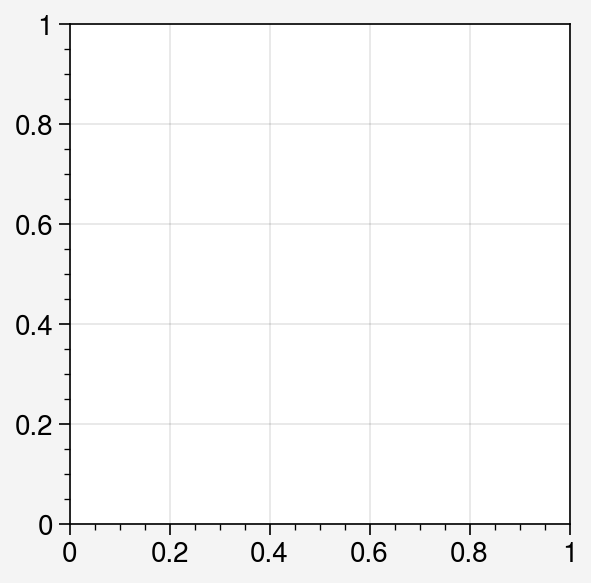

In [16]:
fig,ax = pplt.subplots()

ax.plot(weights, pressure_hpa)
ax.invert_yaxis()